## Exploratory Data Analysis II

IT Salary Survey EU  2020

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets\IT Salary Survey EU  2020.csv')

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\imoce\AppData\Local\Temp\ipykernel_9004\3612942028.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('datasets\IT Salary Survey EU  2020.csv')


In [3]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [4]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [5]:
df = df.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp',
                        'Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])

In [6]:
df.rename(columns = {'Your main technology / programming language': 'Main technology', 
                     'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary', 
                     'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work',
                     'Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'Years of experience' }, inplace = True)

In [7]:
df.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1226 non-null   float64
 1   Gender               1243 non-null   object 
 2   City                 1253 non-null   object 
 3   Position             1247 non-null   object 
 4   Years of experience  1237 non-null   object 
 5   Seniority level      1241 non-null   object 
 6   Main technology      1126 non-null   object 
 7   Other technologies   1096 non-null   object 
 8   Yearly salary        1253 non-null   float64
 9   Vacation days        1185 non-null   object 
 10  Employment status    1236 non-null   object 
 11  Сontract duration    1224 non-null   object 
 12  Language at work     1237 non-null   object 
 13  Company size         1235 non-null   object 
 14  Company type         1228 non-null   object 
dtypes: float64(2), object(13)
memory usage

In [9]:
df.isnull().sum()

Age                     27
Gender                  10
City                     0
Position                 6
Years of experience     16
Seniority level         12
Main technology        127
Other technologies     157
Yearly salary            0
Vacation days           68
Employment status       17
Сontract duration       29
Language at work        16
Company size            18
Company type            25
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly salary'] = df['Yearly salary'].astype(int)

In [11]:
df['Vacation days'] = pd.to_numeric(df['Vacation days'], errors = 'coerce').fillna(0).astype(int)
df['Years of experience'] = pd.to_numeric(df['Years of experience'], errors = 'coerce').fillna(0).astype(int)

Outliers detection

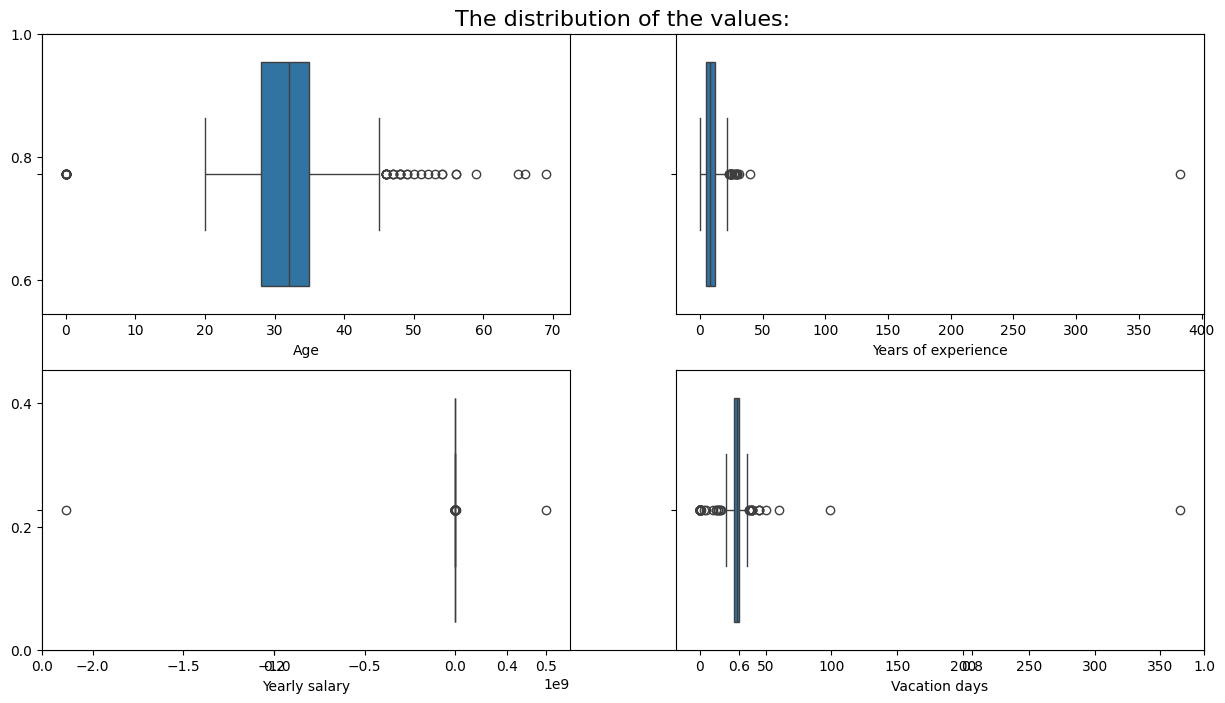

In [12]:

fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values:', fontsize= 16)

axs = fig.subplots(nrows=2, ncols= 2)

sns.boxplot(data = df, x= 'Age', ax = axs[0,0])
sns.boxplot(data = df, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = df, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = df, x= 'Vacation days', ax= axs[1,1])
plt.show()

In [13]:
df['Yearly salary'].sort_values()

473   -2147483648
883         10001
982         10001
366         10164
770         11000
          ...    
804        240000
630        250000
576        300000
778        850000
853     500000000
Name: Yearly salary, Length: 1253, dtype: int32

In [14]:
# delete the exterme outliers by their index

df = df.drop(index = [473, 853])

In [15]:
df['Yearly salary'].sort_values()

883      10001
982      10001
366      10164
770      11000
1135     11500
         ...  
441     200000
804     240000
630     250000
576     300000
778     850000
Name: Yearly salary, Length: 1251, dtype: int32

Data Visualization

In [16]:
df['Age'].sort_values()

904      0
1063     0
829      0
726      0
832      0
        ..
1159    56
23      59
296     65
59      66
1103    69
Name: Age, Length: 1251, dtype: int32

In [17]:
drop_index = (df[df['Age']==0].index).to_list()

In [18]:
df = df.drop(index = drop_index)

In [19]:
df.isnull().sum()

Age                      0
Gender                   3
City                     0
Position                 2
Years of experience      0
Seniority level          8
Main technology        119
Other technologies     148
Yearly salary            0
Vacation days            0
Employment status       13
Сontract duration       23
Language at work        12
Company size            10
Company type            16
dtype: int64

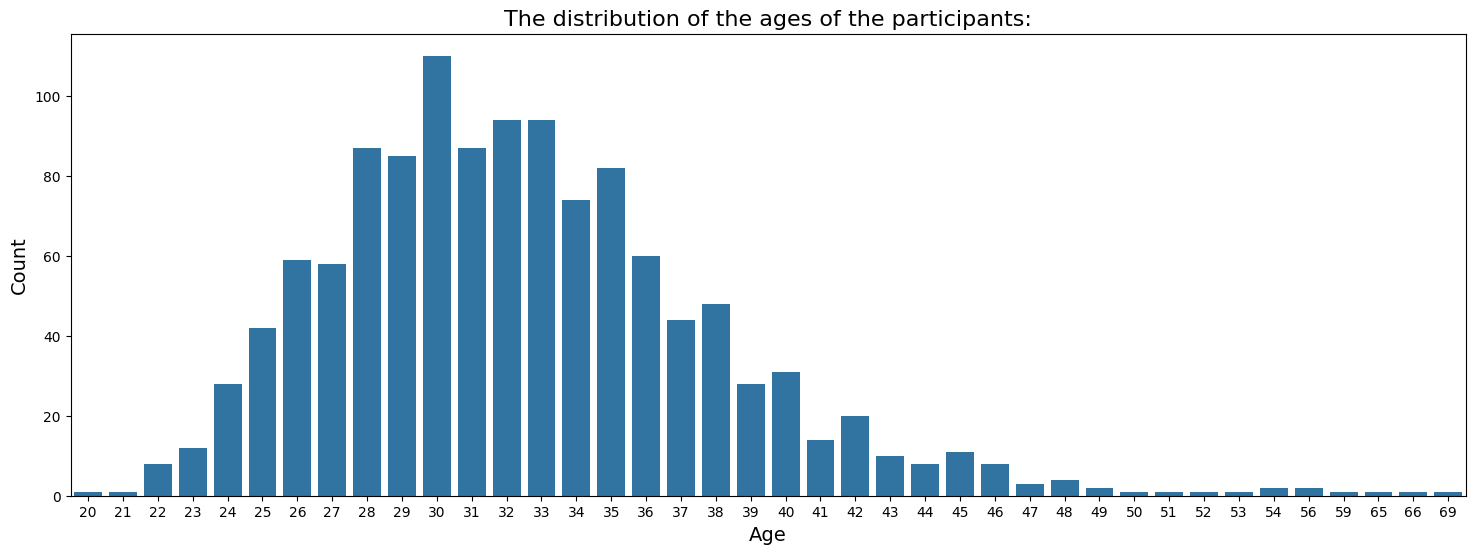

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(data= df, x='Age')
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

C:\Users\imoce\AppData\Local\Temp\ipykernel_9004\326415237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= age_salary, x= 'Age', y= 'Yearly salary',palette= 'flare')


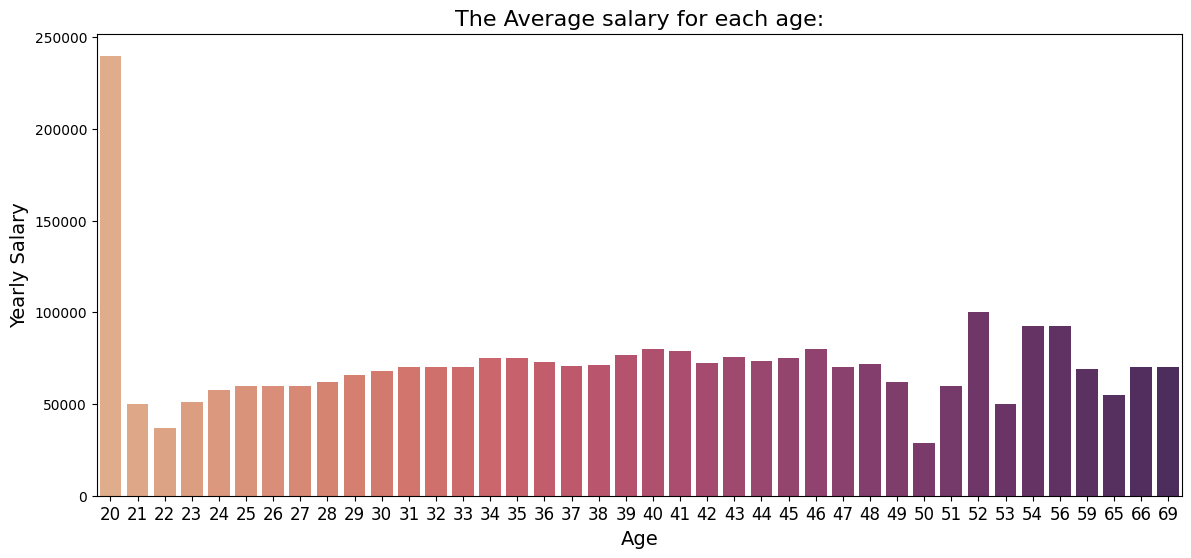

In [21]:
age_salary = df.groupby('Age', as_index = False)['Yearly salary'].median()
plt.figure(figsize=(14, 6))
sns.barplot(data= age_salary, x= 'Age', y= 'Yearly salary',palette= 'flare')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()


C:\Users\imoce\AppData\Local\Temp\ipykernel_9004\2194065689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= df['Gender'], y= df['Age'], palette= 'deep')


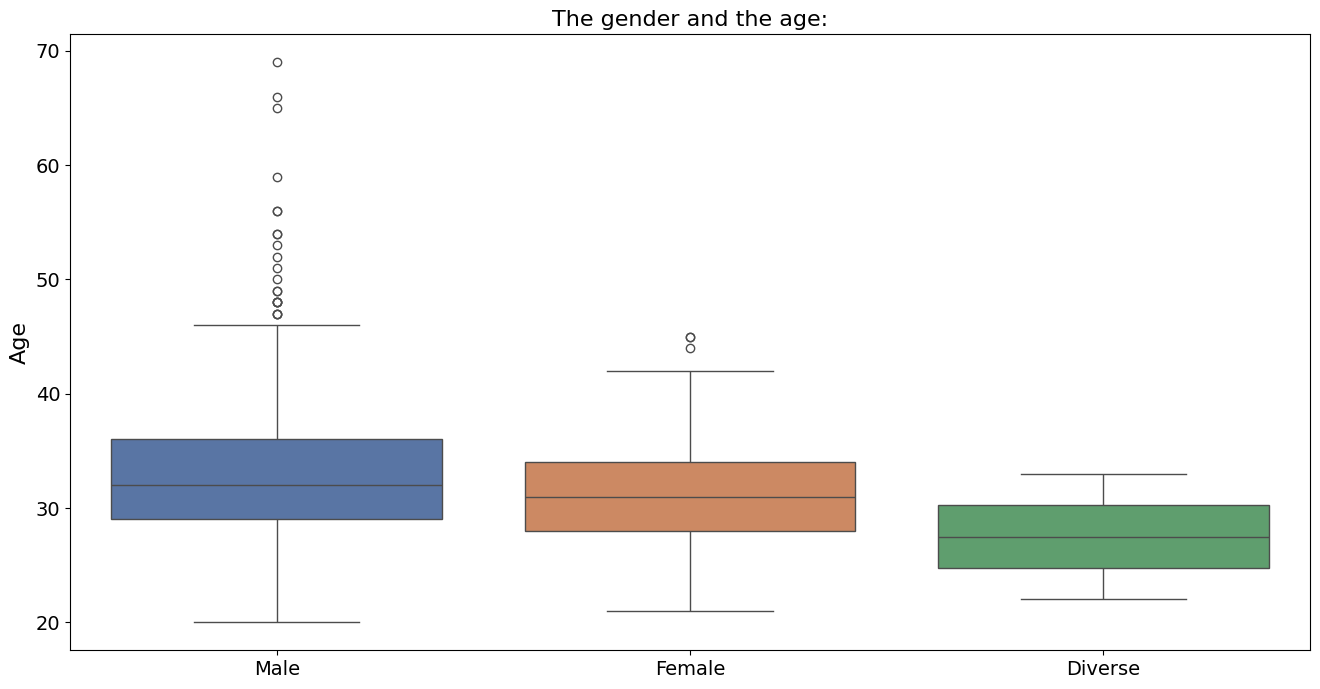

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(data= df, x= df['Gender'], y= df['Age'], palette= 'deep')
plt.title('The gender and the age:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Age', fontsize= 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

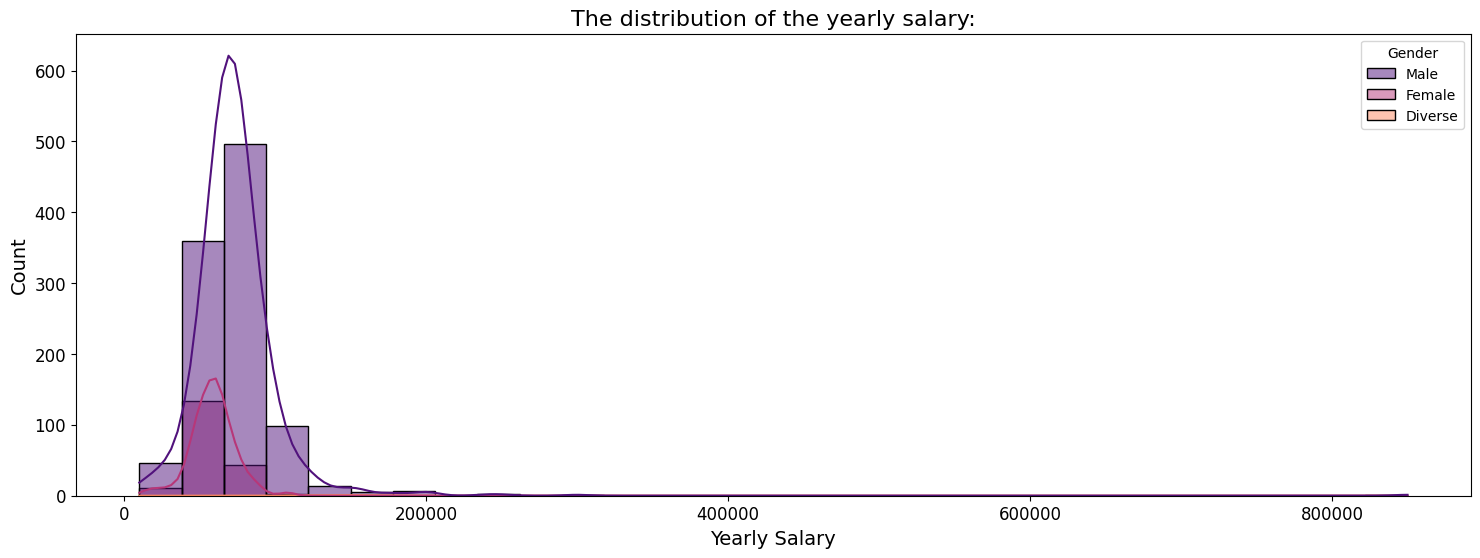

In [23]:
plt.figure(figsize=(18,6))
sns.histplot(data= df, x= 'Yearly salary', hue= 'Gender', palette= 'magma', kde= True, bins = 30)
plt.title('The distribution of the yearly salary:',fontsize= 16)
plt.xlabel('Yearly Salary', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

In [24]:
df['Seniority level'].value_counts()

Seniority level
Senior                                       555
Middle                                       358
Lead                                         162
Junior                                        78
Head                                          43
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Mana

In [25]:
df = df.replace(['javascript','Javascript', 'js', 'JS'], 'JavaScript')
df = df.replace(['python', 'Python '], 'Python')
df = df.replace('c++', 'C++')
df = df.replace(['.net', '.Net'], '.NET')
df = df.replace(['Sql', 'sql'], 'SQL')
df = df.replace(['php','Php'], 'PHP')
df = df.replace('java', 'Java')
df = df.replace(['typescript', 'Typescript'], 'TypeScript')

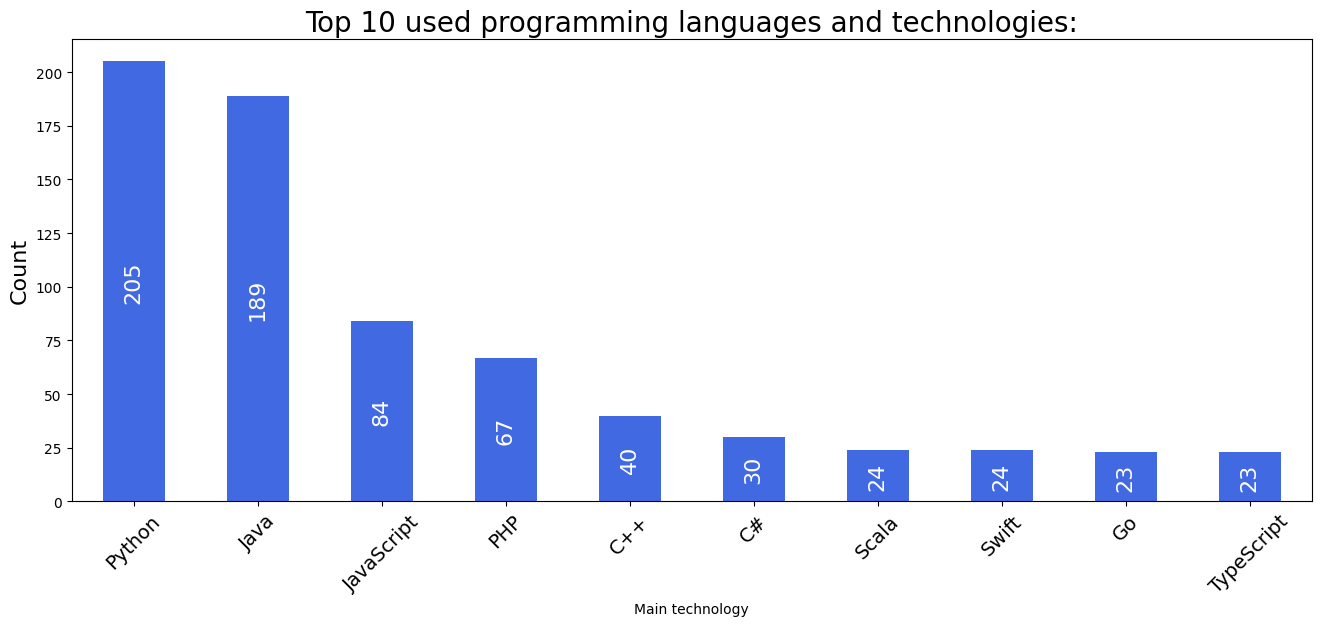

In [26]:
# top 10 programming languages and technologies:

plt.figure(figsize=(16, 6))
ax = df['Main technology'].value_counts().head(10).plot(kind = 'bar', color = 'royalblue')
plt.title('Top 10 used programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 16, rotation = 90, color = 'w')
plt.show()

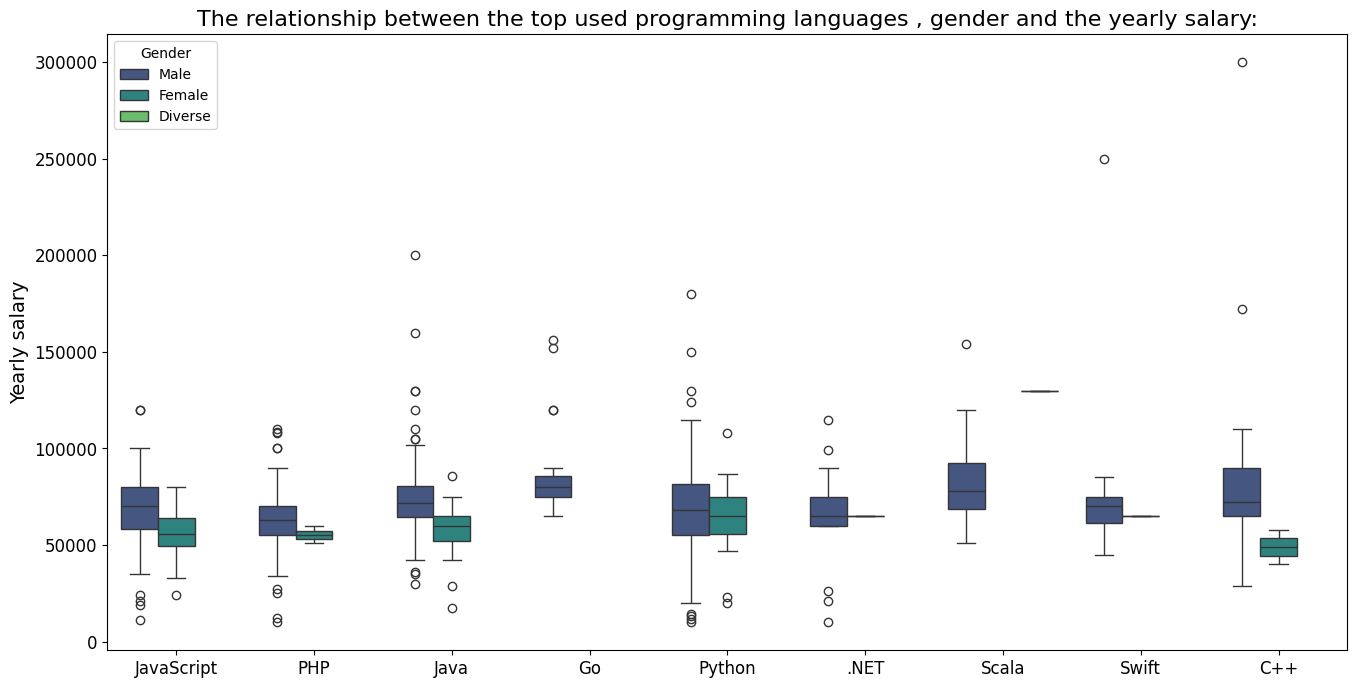

In [27]:
salary_language = df.loc[df['Main technology'].isin(['Python', 'Java', 'JavaScript', 'PHP', 'C++', 'Scala', 'Swift', '.NET', 'Go'])]
plt.figure(figsize = (16,8))
sns.boxplot(data = salary_language, x = 'Main technology', y= 'Yearly salary', hue = 'Gender', palette = 'viridis')
plt.title('The relationship between the top used programming languages , gender and the yearly salary:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Yearly salary', fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()